In [26]:
%run functions.ipynb

## 주파수 영역

In [2]:
# model : 1 = Narrow Band / 2 = Wirsching & Light / 3 = Oritz & Chen / 4 - Dirlik 
model = 2;

## Band Limited White Noise

### (1) Damping

In [3]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,zeta[i],4,1,0;
    blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl,model);

### (2) Overlap

In [4]:
overlap = np.linspace(1,10,10)/100;
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,0.05,4,1,overlap[i];
    blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl,model);

### (3) SDOF 고유진동수가 PSD 주파수 범위 벗어난 경우

In [5]:
bandwidth = np.linspace(1,4,4)/5;
location = np.linspace(0,5,6)/5;
for i in range(len(bandwidth)):
    for j in range(len(location)):
        fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,bandwidth[i],location[j],0.05,4,1,0;
        blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl,model);

### (4) Band Split PSD 증폭

In [6]:
amp_fact = np.linspace(1,np.sqrt(2),10);
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,z,mm,amp,ovl = 1,1000,1,0,0.05,4,amp_fact[i],0;
    blwn_test(fmin,fmax,bwp,loc,z,mm,amp,ovl,model);

## Unimodal

### (1) Damping

In [7]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,0.1,zeta[i],4,1,0;
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl,model);

### (2) Overlap

In [8]:
overlap = np.linspace(1,10,10)/100;
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,0.1,0.05,4,1,overlap[i];
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl,model);

### (3) SDOF 고유진동수가 PSD 주파수 범위 벗어난 경우

In [9]:
bandwidth = np.linspace(1,4,4)/5;
location = np.linspace(0,5,6)/5;
for i in range(len(bandwidth)):
    for j in range(len(location)):
        fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,bandwidth[i],location[j],500,0.1,0.05,4,1,0;
        df = (fmax-fmin)*bwp; f1 = fmin + loc*(fmax-fmin-df); f2 = f1+df; fn1 = (f1+f2)/2;
        unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl,model);

### (4) Band Split PSD 증폭

In [10]:
amp_fact = np.linspace(1,np.sqrt(2),10);
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,0.1,0.05,4,amp_fact[i],0;
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl,model);

### (5) 입력 PSD Damping(irregularity) 영향

In [11]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,zeta[i],0.05,4,1,0;
    unimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl,model);

## Bimodal

### (1) Damping

In [12]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,0.1,750,0.1,1,zeta[i],4,1,0;
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl,model);

### (2) Overlap

In [13]:
overlap = np.linspace(1,10,10)/100;
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,0.1,750,0.1,1,0.05,4,1,overlap[i];
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl,model);

### (3) SDOF 고유진동수가 PSD 주파수 범위 벗어난 경우

In [14]:
bandwidth = np.linspace(1,4,4)/5;
location = np.linspace(0,5,6)/5;
for i in range(len(bandwidth)):
    for j in range(len(location)):
        fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,bandwidth[i],location[j],250,0.1,750,0.1,1,0.05,4,1,0;
        df = (fmax-fmin)*bwp; f1 = fmin + loc*(fmax-fmin-df); f2 = f1+df; fn1 = f1+(f2-f1)/3; fn2 = f1+ 2*(f2-f1)/3;
        bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl,model);

### (4) Band Split PSD 증폭

In [15]:
amp_fact = np.linspace(1,np.sqrt(2),10);
for i in range(len(overlap)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,0.1,750,0.1,1,0.05,4,amp_fact[i],0;
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl,model);

### (5) 입력 PSD Damping(irregularity) 영향

In [16]:
zeta = np.linspace(1,20,20)/100;
for i in range(len(zeta)):
    fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl = 1,1000,1,0,250,zeta[i],750,zeta[i],1,0.05,4,1,0;
    bimodal_test(fmin,fmax,bwp,loc,fn1,zeta1,fn2,zeta2,ratio,z,mm,amp,ovl,model);

## 시간 영역

In [27]:
fmin,fmax,bwp,loc,fn1,zeta1,z,mm,amp,ovl = 1,1000,1,0,500,0.1,0.05,4,1,0.1;
# Generate Input PSD
freq_spec = np.logspace(np.log10(fmin),np.log10(fmax),5000); psd_spec = np.zeros(5000); 
for i in range(5000):
    psd_spec[i]= unimodal(freq_spec[i],fmin,fmax,bwp,loc,fn1,zeta1);
# Band Split
fi,pi = freq_spec,psd_spec;
dfi,dpi = band_split(fi,pi,2);
if ovl > 0:
    xlim1 = max(dfi[0])*0.9; xlim2 = min(dfi[1])*1.1;
    dfi,dpi = bs_overlap(dfi,dpi,ovl); # overlap

In [28]:
t1,th1 = psd2th_wn(fi,pi,50);
t2,th2 = psd2th_wn(dfi[0],dpi[0],50);
t3,th3 = psd2th_wn(dfi[1],dpi[1],50);

In [33]:
f_syn1,p_syn1 = th2psd(t1,th1,2**12);
f_syn2,p_syn2 = th2psd(t2,th2,2**12);
f_syn3,p_syn3 = th2psd(t3,th3,2**12);

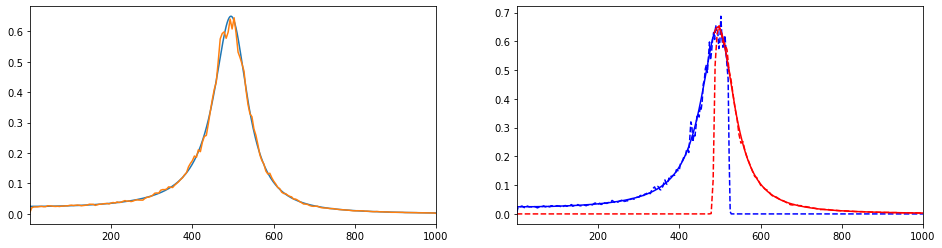

In [34]:
plt.figure(figsize=(16,4));
plt.subplot(121);
plt.plot(fi,pi); plt.plot(f_syn1,p_syn1);
plt.xlim(min(fi),max(fi));
plt.subplot(122);
plt.plot(dfi[0],dpi[0],'b-'); 
plt.plot(f_syn2,p_syn2,'b--');
plt.plot(dfi[1],dpi[1],'r-'); 
plt.plot(f_syn3,p_syn3,'r--');
plt.xlim(min(dfi[0]),max(dfi[1]));